In [3]:
'''
6.1.1Tensor的数据类型
    1、torch.FloatTensor
    2、torch.IntTensor 
    3、torch.rand
    4、torch.randn
    5、torch.range(*, *, *)  三个参数，分别是起始值、结束值、步长
    6、torch.zeros()
'''

import torch

#  1、torch.FloatTensor
a = torch.FloatTensor(2, 3)
b = torch.FloatTensor([2, 3, 4, 5, 6])
print(a)
print(b)
#  2、torch.IntTensor  
a = torch.IntTensor(2, 3)
print(a)
# 3、torch.rand   生成0-1之间的均匀分布
a =torch.rand(2, 3)
print(a)
# 4、torch.randn  生成标准正态分布
a = torch.randn(2, 3)
print(a)
# 5、torch.range()
a = torch.range(1,10, 1)
print(a)
# 6、torch.zeros()
a = torch.zeros(2, 3)
print(a)

tensor([[1.8492e+31, 7.2708e+31, 1.9349e-19],
        [4.6242e+19, 3.0719e+32, 5.1017e-11]])
tensor([2., 3., 4., 5., 6.])
tensor([[1073741824, 1077936128,          1],
        [         0,          1,          0]], dtype=torch.int32)
tensor([[0.3250, 0.8028, 0.2592],
        [0.9299, 0.4110, 0.4139]])
tensor([[-0.4777,  0.5981,  2.1570],
        [ 0.7722, -1.6480,  1.6450]])


D:\0Anaconde\Path\lib\site-packages\ipykernel_launcher.py:28: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].


tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [4]:
'''
6.1.2 Tensor的运算
1、torch.abs()     括号里为Tensor数据类型，输入一个参数，求绝对值
2、torch.add()    输入两个参数，括号里至少有一个为Tensor数据类型，求两个数据的和
3、torch.clamp()  按照自定义范围裁剪，输入三个参数，比如（a, -0.1, 0.1），结果是：比-0.1小的数变成-0.1，比0.1大的数变成0.1，
                                介于两者之间的数不变。
4、torch.div()       张量的除法，输入两个参数，前面的是被除数，后面的是除数，两个参数可以都是张量，也可其中一个是张量一个是标量。
5、torch.mul()     张量的乘法运算，输入两个参数，可以都是张量，也可张量和标量的组合。
6、torch.pow()    张量的幂运算，输入两个参数，可以都是张量，也可张量和标量的组合。
7、torch.mm()     矩阵求积运算，输入两个参数必须是矩阵，而且要满足矩阵运算的维度条件。
8、torch.mv()      矩阵和向量求积，两个参数，第一个表示矩阵，第二个表示向量。
9、str.format()    这不是torch函数，是Python的字符串格式化函数。具体用法为
    "{} {}".format("hello", "world")
    输出：'hello world'
    还可以设置指定位置
    "{1} {0} {1}".format("hello", "world") 
    输出：'world hello world'
'''
import torch

a = torch.randn(2,3)
print(a)
a = torch.clamp(a, -0.1, 0.1)
print(a)
a = torch.div(0.1, a)
print(a)

tensor([[-0.6287, -0.8446,  0.1038],
        [-2.2130,  1.4214, -0.2431]])
tensor([[-0.1000, -0.1000,  0.1000],
        [-0.1000,  0.1000, -0.1000]])
tensor([[-1., -1.,  1.],
        [-1.,  1., -1.]])


In [26]:
x = torch.randn(2, 3)
y = torch.randn(3,2)
a = x.mm(y)
print(a)
a = torch.mm(x, y)
print(a)

print ( "Epoch : {}, Loss: {:.4f} " . format(20 , 14.56165))
# print ( "Epoch : {}, Loss: {:.4f} " . format(20 , 14.56))

tensor([[ 0.4990,  0.1129],
        [-2.2857, -0.3143]])
tensor([[ 0.4990,  0.1129],
        [-2.2857, -0.3143]])
Epoch : 20, Loss: 14.5617 


In [75]:
import torch
a = torch.randn(3, 3)
# b = torch.randn(2, 2)
# print(a)
# print(b)
# c = a.t()
# print(c)
# print(c)
b = torch.randn(3, 3)
# c = b.mm(a)
c = a.mm(b)
print(c)
c = b.t().mm(a)
print(c)


tensor([[-1.7609, -1.7786, -0.6658],
        [-1.0171, -2.6700,  1.0057],
        [ 0.8911,  6.5463, -1.5754]])
tensor([[-1.1133, -0.6634, -1.4330],
        [-2.5518, -0.8311,  1.3125],
        [-1.2955,  1.0138, -0.5624]])


In [1]:
'''
6.1.3
搭建一个简单的神经网络
'''
import torch

batch_n = 100
hidden_layer = 100
input_data = 1000
output_data = 10

x = torch.randn(batch_n, input_data)
y = torch.randn(batch_n,output_data)
w1 = torch.randn(input_data, hidden_layer)
w2 = torch.randn(hidden_layer, output_data)

epoch_n = 30
learning_rate = 1.63e-6

for epoch in range(epoch_n):
    #前向传播
    h = x.mm(w1)
    h1 = h.clamp(min = 0)
    y_pred = h1.mm(w2)
    loose = (y_pred - y).pow(2).sum()
    print("Epoch:{}--Loose:{:.4f}".format(epoch,loose))
    #后向传播
    grad_y_pred = 2*(y_pred - y)
    grad_w2 = h1.t().mm(grad_y_pred)
    
    grad_w1 = grad_y_pred.mm(w2.t())
    grad_w1 = grad_w1.clamp(min = 0)
    grad_w1 = x.t().mm(grad_w1)
    
    w1 -= learning_rate*grad_w1
    w2 -= learning_rate*grad_w2

Epoch:0--Loose:43926648.0000
Epoch:1--Loose:248417552.0000
Epoch:2--Loose:2550679040.0000
Epoch:3--Loose:23176936.0000
Epoch:4--Loose:1230739.2500
Epoch:5--Loose:291426.2812
Epoch:6--Loose:136960.6719
Epoch:7--Loose:72991.8672
Epoch:8--Loose:42268.0078
Epoch:9--Loose:25855.5195
Epoch:10--Loose:16477.2832
Epoch:11--Loose:10877.1719
Epoch:12--Loose:7426.2188
Epoch:13--Loose:5251.8555
Epoch:14--Loose:3851.5042
Epoch:15--Loose:2936.2612
Epoch:16--Loose:2330.3411
Epoch:17--Loose:1922.9001
Epoch:18--Loose:1646.5895
Epoch:19--Loose:1456.4772
Epoch:20--Loose:1324.6995
Epoch:21--Loose:1232.9636
Epoch:22--Loose:1168.5793
Epoch:23--Loose:1122.8755
Epoch:24--Loose:1090.4092
Epoch:25--Loose:1068.0686
Epoch:26--Loose:1052.6409
Epoch:27--Loose:1041.7349
Epoch:28--Loose:1034.0837
Epoch:29--Loose:1028.6536


In [6]:
'''
6.2自动梯度
6.2.1torch.autograd包和Veriable

'''
import torch
from torch.autograd import Variable as vb

batch_n = 100
hidden_layer = 100
input_data = 1000
output_data = 10

x = vb(torch.randn(batch_n, input_data), requires_grad = False)#100X1000
y = vb(torch.randn(batch_n, output_data), requires_grad = False)#100X10
w1 = vb(torch.randn(input_data, hidden_layer), requires_grad = True)#1000X100
w2 = vb(torch.randn(hidden_layer, output_data), requires_grad = True)#100X10

epoch_n =20
learning_rate = 1.63e-6

for epoch  in range(epoch_n):
    y_p = x.mm(w1).clamp(min = 0).mm(w2)
    loose = (y_p - y).pow(2).sum()
    print("Epoch:{}--Loose:{:.4f}".format(epoch,loose))
    
    
    loose.backward()                                                                              #backward（）函数自动计算梯度值并根据需要进行保存
    w1.data -= learning_rate*w1.grad.data
    w2.data -= learning_rate*w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()


Epoch:0--Loose:56685560.0000
Epoch:1--Loose:478639072.0000
Epoch:2--Loose:2546666752.0000
Epoch:3--Loose:194452336.0000
Epoch:4--Loose:1440799.5000
Epoch:5--Loose:861657.6875
Epoch:6--Loose:652259.3125
Epoch:7--Loose:531469.1250
Epoch:8--Loose:450198.0938
Epoch:9--Loose:390975.8125
Epoch:10--Loose:344912.2188
Epoch:11--Loose:307764.1250
Epoch:12--Loose:277239.7500
Epoch:13--Loose:251836.1406
Epoch:14--Loose:230305.3750
Epoch:15--Loose:211918.8750
Epoch:16--Loose:196033.5156
Epoch:17--Loose:182124.4531
Epoch:18--Loose:169994.2656
Epoch:19--Loose:159268.4531


In [41]:
'''
继承类torch.nn.Module
可以自定义传播函数
示例如下：

'''
#导入和定义数据部分跟上面一样，不在重复，从继承类开始写
# import torch
# from torch.autograd import Variable as vb

# batch_n = 100
# hidden_layer = 100
# input_data = 1000
# output_data = 10

# x = vb(torch.randn(batch_n, input_data), requires_grad = False)#100X1000
# y = vb(torch.randn(batch_n, output_data), requires_grad = False)#100X10
# w1 = vb(torch.randn(input_data, hidden_layer), requires_grad = True)#1000X100
# w2 = vb(torch.randn(hidden_layer, output_data), requires_grad = True)#100X10

# epoch_n =20
# learning_rate = 1.63e-6


class Model(torch.nn.Module):
     
        def __init__(self):
            super(Model, self).__init__()
        
        def forward(self, input, w1, w2):
            y_pred = input.mm(w1).clamp(min = 0).mm(w2)
            return y_pred

model = Model()

# for epoch  in range(epoch_n):
# #     y_p = x.mm(w1).clamp(min = 0).mm(w2)
#     y_p = model(x, w1, w2)
#     loose = (y_p - y).pow(2).sum()
#     print("Epoch:{}--Loose:{:.4f}".format(epoch,loose))
    
#     loose.backward()
#     w1.data -= learning_rate*w1.grad.data
#     w2.data -= learning_rate*w2.grad.data
#     w1.grad.data.zero_()
#     w2.grad.data.zero_()

Epoch:0--Loose:45692060.0000
Epoch:1--Loose:283730496.0000
Epoch:2--Loose:2611219456.0000
Epoch:3--Loose:523133184.0000
Epoch:4--Loose:43447220.0000
Epoch:5--Loose:289990.4375
Epoch:6--Loose:85126.8906
Epoch:7--Loose:42102.2891
Epoch:8--Loose:23653.2559
Epoch:9--Loose:14426.5605
Epoch:10--Loose:9436.5029
Epoch:11--Loose:6525.7378
Epoch:12--Loose:4749.3369
Epoch:13--Loose:3615.2559
Epoch:14--Loose:2867.0010
Epoch:15--Loose:2356.4907
Epoch:16--Loose:2000.7346
Epoch:17--Loose:1745.7230
Epoch:18--Loose:1559.5380
Epoch:19--Loose:1421.3151


In [8]:
'''
6.3模型搭建和参数优化
6.3.1  torch.nn包
（1）torch.nn.Sequential():这不是一种类，但是在它里面可以镶嵌很多类，可以看成一种容器，能自动生成参数，镶嵌的类很多，比如：
          torch.nn.Linear()
          torch.nn.ReLU()      
（2）计算误差的类
          torch.nn.MSELoss()  :用的是均方误差，传入的x，y参数必须同维度
          torch.nn.L1Loss()      :用的是平均绝对误差，x，y必须同维度
          torch.nn.CrossEntropyLoss():输入的参数满足交叉熵计算条件，什么是交叉熵的计算条件我也不知道，但是示例上的为：
          第l 组参数是一个随机参数，维度为（3,5）；第2 组参数是3 个范围为0～4 的随机数字。
          x = Variable(torch . randn(3 , 5))
          y = Variable(torch . LongTensor(3) . random(5))
'''
import torch
from torch.autograd import Variable 
from collections import OrderedDict as od

batch_data = 100
input_data = 1000
hidden_layer = 100
output_data = 10

x = Variable(torch.randn(batch_data, input_data), requires_grad = False)
y = Variable(torch.randn(batch_data,output_data), requires_grad = False)

#自动生成对应维度的参数，调用时候只需要输入输入数据x，就会输出预测值y_pred
models = torch.nn.Sequential(od([
    ("Linear1:",torch.nn.Linear(input_data, hidden_layer)),
    ("ReLU1:",torch.nn.ReLU()),
    ("Linear2:",torch.nn.Linear(hidden_layer, output_data))
]))
#接下来就需要对搭建好的模型进行训练和优化参数

epoch_n = 1000
learning_rate = 1e-4

loss_fn = torch.nn.MSELoss()

# print(model)

In [7]:
'''
这里从头开始写一个程序，用models

'''
import torch
from torch.autograd import Variable
from collections import OrderedDict

#定义数据的维度
batch_n = 100
input_data = 1000
hidden_layer = 100
output_data = 10

#定义输入和输出数据的维度
x = Variable(torch.randn(batch_n, input_data), requires_grad = False)
y = Variable(torch.randn(batch_n, output_data), requires_grad = False)

#生成预测值和参数更新的对象
models = torch.nn.Sequential(OrderedDict([
    ("Linear1:",torch.nn.Linear(input_data, hidden_layer)),
    ("ReLu1:",torch.nn.ReLU()),
     ("Linear2:",torch.nn.Linear( hidden_layer,output_data))
]))

#定义训练次数、学习效率和损失函数
epoch_n = 200
learning_rate = 1e-4
loss_fn = torch.nn.MSELoss()

#训练模型、优化参数、更新参数
optimzer = torch.optim.Adam(models.parameters(), lr = learning_rate)
for epoch in range(epoch_n):
    #前向传播
    #求预测值
    y_pred = models(x)
    #求损失值
    loss = loss_fn(y_pred, y)
    #打印损失值
    if epoch%10 ==0:
        print("Epoch:{}, Loss:{:.4f}".format(epoch, loss.data))
    
    #后向传播，计算梯度，计算前必须清除梯度值，不然会累加梯度
#     models.zero_grad()
    optimzer.zero_grad()
    loss.backward()
#     models.zero_grad()
    
    #计算完梯度之后，就是梯度更新
#     for param in models.parameters():
#         param.data -= learning_rate*param.grad.data
    optimzer.step()

Epoch:0, Loss:1.1010
Epoch:10, Loss:0.9033
Epoch:20, Loss:0.7485
Epoch:30, Loss:0.6246
Epoch:40, Loss:0.5231
Epoch:50, Loss:0.4378
Epoch:60, Loss:0.3650
Epoch:70, Loss:0.3019
Epoch:80, Loss:0.2474
Epoch:90, Loss:0.2001
Epoch:100, Loss:0.1600
Epoch:110, Loss:0.1264
Epoch:120, Loss:0.0986
Epoch:130, Loss:0.0760
Epoch:140, Loss:0.0578
Epoch:150, Loss:0.0435
Epoch:160, Loss:0.0323
Epoch:170, Loss:0.0237
Epoch:180, Loss:0.0172
Epoch:190, Loss:0.0124


In [34]:
'''
6.3.2torch.optim包
自动化的优化函数
torch.optim包中有很多类，比如SGD 、AdaGrad 、RMSProp、Adam等，这些都可以直接调用
'''
'''
例子1：调用Adam类实例一个对象，这个类需要输入两个参数：需要优化的参数和学习效率初始值
'''
optimzer = torch.optim.Adam(models.parameters(), lr = learning_rate)

[6, 0, 8, 8, 0, 1, 2, 5, 9, 1, 5, 7, 6, 6, 2, 9, 0, 2, 1, 2, 5, 2, 1, 0, 7, 8, 7, 8, 7, 4, 5, 2, 2, 2, 9, 0, 4, 4, 7, 2, 7, 0, 1, 4, 2, 6, 5, 7, 7, 7, 4, 7, 0, 3, 0, 6, 2, 1, 4, 3, 0, 1, 8, 2]


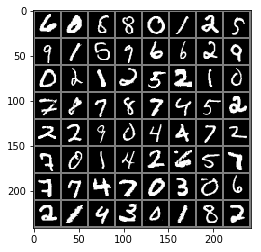

In [3]:
'''
6.4实战手写数字
'''
'''
6.4.1torch和torchvision
第一步，首先得下载数据集
第二步，下载完了数据之后需要对数据进行变换，有几种情况需要变换的
        如果获取的数据格式不一样，就进行归一化处理
        如果图片大小不一样，就进行大小缩放
        此外还可以进行数据增强（Data Argumentation），如果参与训练的图片数据十分有限，我们就需要进行各种变换
        来获得新的训练集了，这些变换可以是放缩或者翻转等。
'''
import torch
# import tensorflow
from torch.autograd import Variable
from torchvision import datasets,transforms
import numpy
import matplotlib.pyplot as plt
import torchvision.transforms

'''
在下载数据集之前需要定义变换类型，用torch.transforms，我们用到的数据一般都是图片，所以首先要解决的就是
数据类型的转换，然后归一化和大小缩放等选择性使用
torcn.transform.Conpose()有三个参数，分别是累心转换、归一化和放缩
'''
transform = transforms.Compose([transforms.ToTensor(), 
#                                 transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                                transforms.Normalize(mean = [0.5],
                                     std = [0.5])])#std:standard deviation
'''
torchvision.transform中还有很多变换
    1、torchvision.transform.Resize()和torchvision.transform():参数可以有两种：一个整数表示放缩的宽度和高度都是这个值；也可以是（h, w）序列
    表示高度和宽度。
    2、torchvision.transform.CenterCrop():以图像中心为参考点，按照我们的需要进行裁剪。参数可以是一个整数也可以是
    （h, w）序列。
    3、torchvision.transform.RandomCrop():按照需要进行随机裁剪，参数和上面一样。
    4、torcnvision.transform.RandomHorizontalFlip()和.RandomVerticalFlip():按照随机概率水平翻转，概率可以是我们
    自定义的参数，也可以是默认参数0.5
    5、torchvision.transform.ToTensor():将PIL图片数据转换成Tensor张量数据，便于Python处理。
    6、torchvision.transform.ToPILImage()：将Tensor张量数据转换成PIL图片数据。主要为了方便图片的显示。
'''



# 下载手写数字数据集
data_train = datasets.MNIST(root = "./data1/",
                            transform = transform,
                            train = True,
                            download = True
                           )
data_test = datasets.MNIST(root = "./data1/",
                           transform = transform,
                           train = False
                          )
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = [0.5, 0.5, 0.5],
#                                      std = [0.5, 0.5, 0.5])])#std:standard deviation

#下载了数据集后加载数据集，可以看成一个打包数据的过程，打包完了之后交给模型训练
data_train_loader = torch.utils.data.DataLoader(dataset = data_train,
                                               batch_size = 64,
                                               shuffle = True)
data_test_loader = torch.utils.data.DataLoader(dataset = data_test,
                                              batch_size = 64,
                                              shuffle = True)


#做一个小实验，验证X_train, Y_train和Variable()到底是啥
# for data in data_train_loader:
#     x_train, y_train = data
#     print(x_train.shape)
# #     print(x_train)
#     x_train, y_train = Variable(x_train), Variable(y_train)
#     print(x_train.shape)
# #     print(x_train)
#     break

#下面的代码是用来预览批次图片的

#加载完成之后先显示对应的标签和图片，每个装载的批次图片数据是4维的(batch_size, channel, height,weight）
images, labels = next(iter(data_train_loader))   #next和iter：iter用于生成迭代器，next用于获得迭代器中的下一个数据，当迭代完成后会自动停止
#将一个批次的图片变成网格模式，make_grid的输入是一批图片数据，输出数据变成三维的了，(channel, height, weight)

#测试2维卷积函数部分
"""

print(images.shape)
conv1 = torch.nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding = 1)

img = torch.tensor(images)
img = conv1(images)
print(img.shape)

"""
#紧接着上面预览图片的程序

img = torchvision.utils.make_grid(images)
#用Matplotlib显示图片时候，
img = img.numpy().transpose(1, 2, 0)
# print(img.shape[2])
#去归一化
mean = 0.5
std = 0.5
img = img*std + mean
#打印标签
#for i in range(64):
#     print(labels[i], end = ",")
#使用第二种打印方法：
print([int(labels[i]) for i in range(64)])
plt.imshow(img)




In [8]:
'''
搭建神经网络模型
搭建模型和优化参数
这次搭建的模型中包含：卷积层、激活函数层、池化层、全连接层，所以和之前的神经网络模型有所区别
对应层的搭建依靠的类分别是：torch.nn.Conv2d、torch.nn.ReLU、torch.nn.MaxPool2d、torch.nn.Linear
'''
'''
image.shape[0]:图片的垂直尺寸
image.shape[1]:图片的水平尺寸
image.shape[2]:图片的色彩通道数
'''
'''
torch.nn.Conv2d()：需要输入的数据为tensor张量，且维度必须是4维的，即(batch_size, channel, height, weight)
'''
#紧接着上面装载之后的程序，下面搭建和训练模型以及优化更新参数

class Model(torch.nn.Module):
    def __init__(self):
        
        super(Model, self).__init__()
        
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size = 3, stride = 1, padding = 1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.dense = torch.nn.Sequential(
            torch.nn.Linear(14*14*128, 1024),
            torch.nn.ReLU(),
            torch.nn.Dropout(p = 0.5),
            torch.nn.Linear(1024, 10)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(-1, 14*14*128)
        x = self.dense(x)
        return x    #模型搭建完毕
    
#定义模型
model = Model()
# model = model.cuda()
# print(model)
#定义训练次数、损失函数、优化函数
epoch_n = 5
cost = torch.nn.CrossEntropyLoss()
optimzer = torch.optim.Adam(model.parameters())


#开始训练、优化更新参数
for epoch in range(epoch_n):
    running_loss = 0.0
    running_correct = 0.0
    print("Epoch:{}/{}".format(epoch, epoch_n))
    print("-"*10)
    #训练和优化
    for data in data_train_loader:
        x_train, y_train = data
        x_train, y_train = Variable(x_train), Variable(y_train)
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        model = model.cuda()
        outputs = model(x_train)
        _, pred = torch.max(outputs, 1)
        loss = cost(outputs, y_train)
        
        #后向传播。先清除梯度
        optimzer.zero_grad()
        loss.backward()
        
        #计算总损失值和准确次数
        running_loss += loss.data
        running_correct += torch.sum(pred == y_train)
#         print(running_loss)
#         print(running_correct)
#         break
    #打印损失值和训练准确率
    running_loss /= len(data_train)
    running_correct /= len(data_train)
    print("Running Loss is:{}, Running Correct is:{}".format(running_loss, running_correct*100))
        

Epoch:0/5
----------


AssertionError: 
The NVIDIA driver on your system is too old (found version 8000).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.

In [ ]:
#使用测试数据集测试模型的泛化能力
data_test_loader = torch.utils.data.DataLoader(dataset = data_test,
                                           batch_size = 9,
                                           shuffle = True)

#获得图片的标签
x_test, y_test = next(iter(data_test_loader))
#预测结果
input = Variable(x_test)
output = model(input)
_, pred = torch.max(output, 1)
#打印真实标签和预测标签
print("The True lables are:", [int(i) for i in y_test.data])
print("The Predict labels are:", [int(i) for i in pred.data])